[*********************100%%**********************]  10 of 10 completed
1 jours VaR @ 95% confiance: 253.05
2 jours VaR @ 95% confiance: 357.87
3 jours VaR @ 95% confiance: 438.3
4 jours VaR @ 95% confiance: 506.1
5 jours VaR @ 95% confiance: 565.84
6 jours VaR @ 95% confiance: 619.84
7 jours VaR @ 95% confiance: 669.51
8 jours VaR @ 95% confiance: 715.74
9 jours VaR @ 95% confiance: 759.15
10 jours VaR @ 95% confiance: 800.22
11 jours VaR @ 95% confiance: 839.27
12 jours VaR @ 95% confiance: 876.59
13 jours VaR @ 95% confiance: 912.39
14 jours VaR @ 95% confiance: 946.83
15 jours VaR @ 95% confiance: 980.06
16 jours VaR @ 95% confiance: 1012.2
17 jours VaR @ 95% confiance: 1043.35
18 jours VaR @ 95% confiance: 1073.6
19 jours VaR @ 95% confiance: 1103.02
20 jours VaR @ 95% confiance: 1131.68


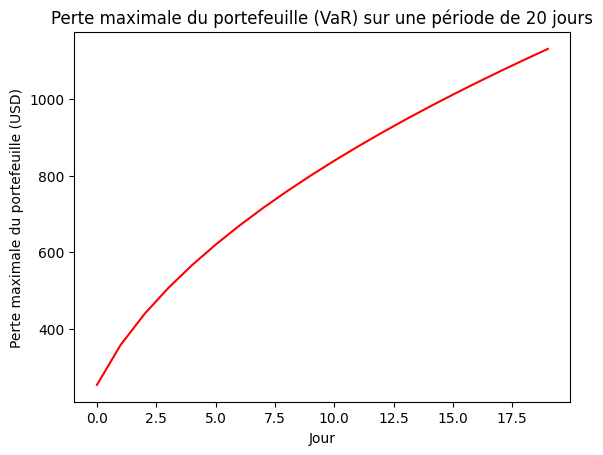

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt  # N'oubliez pas d'importer la bibliothèque matplotlib pour créer des graphiques.

# Liste des symboles d'actions
symboles = ['AAPL', 'MSFT', 'GOOGL', 'STLD', 'IBM', 'BMW.DE', 'VOW3.DE', 'AIR.PA', 'ALV.DE', 'GE']

# Poids des actifs dans le portefeuille
poids = np.array([0.1739, 0.0394, 0.0018, 0.3011, 0.0041, 0.1691, 0.03, 0.0114, 0.2636, 0.0055])

# Définir un niveau d'investissement initial
investissement_initial = 10000

# Récupération des données historiques des actions
data = yf.download(symboles, start='2018-01-01', end='2023-10-03')['Adj Close']

# À partir des prix de clôture, calculez les rendements logarithmiques pour chaque action
rendements_log = np.log(data / data.shift(1))

# Générer la matrice Var-Cov
matrice_cov = rendements_log.cov()

# Calculer les rendements moyens pour chaque action
rendements_moyens = rendements_log.mean()

# Calculer les rendements moyens pour l'ensemble du portefeuille,
# en utilisant le produit scalaire pour normaliser les moyennes individuelles en fonction des poids d'investissement
rendement_portefeuille = rendements_moyens.dot(poids)

# Calculer l'écart-type du portefeuille
ecart_type_portefeuille = np.sqrt(poids.T.dot(matrice_cov).dot(poids))

# Calculer la moyenne de l'investissement
moyenne_investissement = (1+rendement_portefeuille) * investissement_initial

# Calculer l'écart-type de l'investissement
ecart_type_investissement = investissement_initial * ecart_type_portefeuille

# Sélectionner notre intervalle de confiance (je choisirai 95% ici)
niveau_confiance1 = 0.05

# Utilisation de la méthode ppf de SciPy pour générer des valeurs pour la
# fonction de distribution cumulative inverse d'une distribution normale
# En utilisant la moyenne, l'écart-type de notre portefeuille
from scipy.stats import norm
seuil1 = norm.ppf(niveau_confiance1, moyenne_investissement, ecart_type_investissement)

# Enfin, nous pouvons calculer la VaR à notre intervalle de confiance
var_1j1 = investissement_initial - seuil1

# Calculer la VaR sur n jours
tableau_var = []
nb_jours = int(20)
for x in range(1, nb_jours+1):
    tableau_var.append(np.round(var_1j1 * np.sqrt(x), 2))
    print(str(x) + " jours VaR @ 95% confiance: " + str(np.round(var_1j1 * np.sqrt(x), 2)))

# Construire le graphique
plt.xlabel("Jour")
plt.ylabel("Perte maximale du portefeuille (USD)")
plt.title("Perte maximale du portefeuille (VaR) sur une période de 20 jours")
plt.plot(tableau_var, "r")

# Afficher le graphique
plt.show()
